In [2]:
import pandas as pd 
import numpy as np
import sklearn 

data = pd.read_csv("HDI.csv")
print(data)

          Country  Human Development Index  Mean Mathematics Performance Score
0          Norway                     94.9                                 502
1       Australia                     93.9                                 494
2     New Zealand                     91.5                                 495
3   United States                     92.0                                 470
4         Ireland                     92.3                                 504
5         Iceland                     92.1                                 488
6     Netherlands                     92.4                                 512
7          Canada                     92.0                                 516
8         Germany                     92.6                                 506
9       Singapore                     92.5                                 564
10      Argentina                     82.7                                 409
11         Brazil                     75.4          

In [3]:
X = data["Human Development Index"]
Y = data["Mean Mathematics Performance Score"]

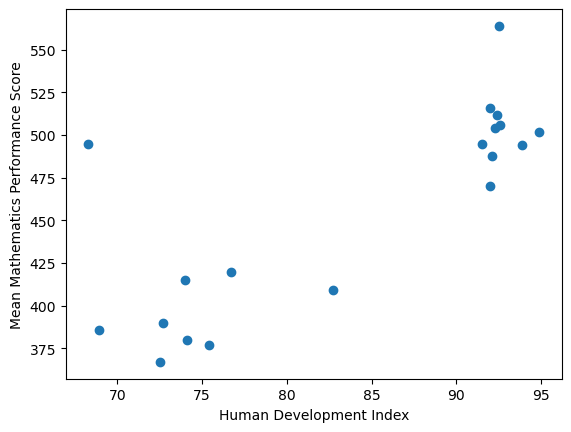

In [5]:
import matplotlib.pyplot as plt 
plt.scatter(X,Y)
plt.xlabel("Human Development Index")
plt.ylabel("Mean Mathematics Performance Score")
plt.show()

In [7]:
import numpy as np 
import scipy.stats
result = scipy.stats.linregress(X,Y)
result

LinregressResult(slope=4.757614700316079, intercept=58.85558970773474, rvalue=0.7922409855274186, pvalue=5.270846568744181e-05, stderr=0.8887623344286066, intercept_stderr=74.94996580217531)

In [9]:
import statsmodels.api as sm 

#add constant term to the predictor variable 
X_with_constant = sm.add_constant(X)


#fit the linear regression model  (Least Square Estimate - to find the beta values)
model = sm.OLS(Y,X_with_constant).fit()

#Print the sdummary of the regression 
print(model.summary())

                                    OLS Regression Results                                    
Dep. Variable:     Mean Mathematics Performance Score   R-squared:                       0.628
Model:                                            OLS   Adj. R-squared:                  0.606
Method:                                 Least Squares   F-statistic:                     28.66
Date:                                Thu, 15 May 2025   Prob (F-statistic):           5.27e-05
Time:                                        14:19:42   Log-Likelihood:                -94.937
No. Observations:                                  19   AIC:                             193.9
Df Residuals:                                      17   BIC:                             195.8
Df Model:                                           1                                         
Covariance Type:                            nonrobust                                         
                              coef    std err     

C:\ProgramData\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


## Simple Regression Equation

In [11]:
import pandas as pd 
import numpy as np
import sklearn 

df = pd.read_csv("cust1.csv")
print(df)

    Sales_Effort  Product_Sales
0            100             10
1             82              8
2             71              7
3            111             11
4            112             11
5             61              6
6             62              6
7            113             11
8            101             10
9             99             10
10            79              8
11            81              8
12            51              5
13            50              5
14            49              5
15            30              3
16            31              3
17            29              3
18            20              2
19            41              4
20            39              4


In [12]:
y = df["Product_Sales"]
X = df.drop(["Product_Sales"], axis =1)

In [17]:
train_sample = 15
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   train_size=train_sample, test_size=6)

In [20]:
#running the Linear Regression
Line_Reg = LinearRegression()
Line_Reg.fit(X_train,y_train)

LinearRegression()

In [22]:
#print regression coefficient 
print(Line_Reg.coef_, Line_Reg.intercept_)

[0.09855362] 0.03422083421554145


In [23]:
#print the regression score using the test data 
#this provides the regression model accuracy 

Line_Reg.score(X_test,y_test)

0.9985012170201029

In [25]:
#finding the mean square error on the test predictions 
np.mean((Line_Reg.predict(X_test)-y_test)**2)

0.014821298356760193

In [26]:
#run the model on the test data to arrive at the predicted values 
predicted = Line_Reg.predict(X_test)

print(predicted)
print(y_test)

[ 9.98813651 10.97367272  2.89227583 11.17077996  9.79102927  5.06045548]
8     10
3     11
17     3
7     11
9     10
12     5
Name: Product_Sales, dtype: int64


In [28]:
#as you can see above there is high agreement between the predicted and 
#actual data 

In [30]:
#We will use the entire data set to carry out the
#prediction using the regression model generated 
predicted_full = Line_Reg.predict(X)
#printing the predicted and actual responses values 
print(predicted_full)
print(y)

[ 9.88958289  8.11561772  7.0315279  10.97367272 11.07222634  6.04599169
  6.14454531 11.17077996  9.98813651  9.79102927  7.81995686  8.0170641
  5.06045548  4.96190186  4.86334824  2.99082945  3.08938307  2.89227583
  2.00529325  4.07491928  3.87781204]
0     10
1      8
2      7
3     11
4     11
5      6
6      6
7     11
8     10
9     10
10     8
11     8
12     5
13     5
14     5
15     3
16     3
17     3
18     2
19     4
20     4
Name: Product_Sales, dtype: int64


## Testing the Assumptions of Regression 


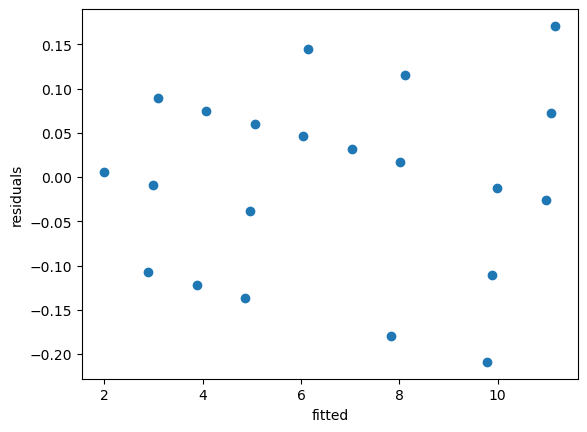

In [31]:
#creating the scatter plot between response variable 
#actual values and predicted values 
import matplotlib.pyplot as plt 
plt.scatter(predicted_full,predicted_full-y)
plt.xlabel("fitted")
plt.ylabel("residuals")
plt.show()

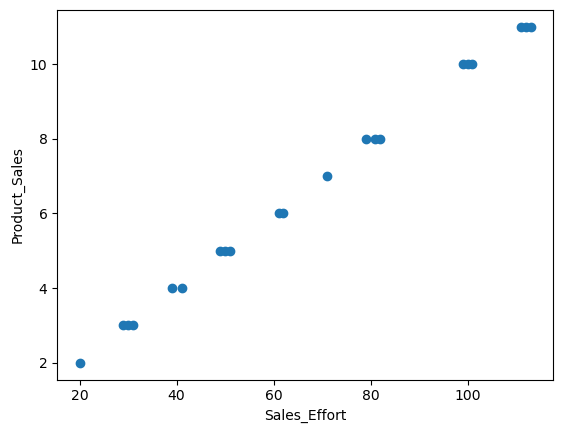

In [32]:
plt.scatter(df.Sales_Effort,df.Product_Sales)
plt.xlabel("Sales_Effort")
plt.ylabel("Product_Sales")
plt.show()